## Final Project Submission

Please fill out:
* Student name: Florian Fedrau


## What to do

We are given the King County House Sales dataset and we want to predict the prices for houses.

## Importing Python Libraries needed for the project

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix # data processing, scatter matrix 
import statsmodels.api as sm # Python module that provides classes and functions for the estimation of many different 
#statistical models, as well as for conducting statistical tests, and statistical data exploration
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats
import sklearn.linear_model as linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
import seaborn as sns
import statsmodels.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from mpl_toolkits.basemap import Basemap
sns.set()
%matplotlib inline

## Import the data

In [2]:
df = pd.read_csv('King_County_House_prices_dataset.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Understanding the data

In [3]:
f = open("column_names.md", "r")
print(f.read())
f.close()

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the neares

## Cleaning the data

Lets get an overview about our data first.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Sort for nan values

In [5]:
df.isna().sum().sort_values()

id                  0
long                0
lat                 0
zipcode             0
yr_built            0
sqft_basement       0
sqft_above          0
grade               0
sqft_living15       0
condition           0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
price               0
date                0
sqft_lot15          0
view               63
waterfront       2376
yr_renovated     3842
dtype: int64

We see that there are missing values in the columns view, waterfront and yr_renovated. Let's get an better understanding of the columns before we decide what to do with them.

## Waterfront

First we take a look at the column waterfront

In [6]:
print("Unique values in waterfront:" + str(df.waterfront.unique()))
print("Mean value of waterfront   :" + str(df.waterfront.mean()))

Unique values in waterfront:[nan  0.  1.]
Mean value of waterfront   :0.007595858696217679


Takeaway, basicly it is an boolean saying if a house has waterfront. We can also see that most of the houses have no waterfront.

We asume that a waterfront is an unique selling point and every houseowner would give us the information if the house has one. So we decide to fill the "nan" with zeros.

In [7]:
df.waterfront.fillna(0, inplace =True)
df.waterfront.unique()

array([0., 1.])

## View

We continue with the next column view

In [8]:
print("Unique values in view : " + str(df.view.unique()))
print("Mean value of view    : " + str(df.view.mean()))
print("Number of Nan for view: " + str(df['view'].isna().sum()))
print("Unique count for view : ")
print(df.groupby('view')['id'].nunique())

Unique values in view : [ 0. nan  3.  4.  2.  1.]
Mean value of view    : 0.23386272870808952
Number of Nan for view: 63
Unique count for view : 
view
0.0    19253
1.0      329
2.0      956
3.0      505
4.0      314
Name: id, dtype: int64


We can see that most of the houses have not been viewed. We have only 63 nan in the column and we can fill them with zeros.

In [9]:
df.view.fillna(0, inplace =True)
df.view.unique()

array([0., 3., 4., 2., 1.])

## yr_renovated

We continue with the column yr_renovated

In [10]:
print("Unique values in yr_renovated : " + str(df.yr_renovated.unique()))
print("Number of Nan for yr_renovated: " + str(df['yr_renovated'].isna().sum()))
print("Unique count for yr_renovated : ")
print(df.groupby('yr_renovated')['id'].nunique().head())

Unique values in yr_renovated : [   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
Number of Nan for yr_renovated: 3842
Unique count for yr_renovated : 
yr_renovated
0.0       16900
1934.0        1
1940.0        2
1944.0        1
1945.0        3
Name: id, dtype: int64


We asume that a renovation is an uique selling point and the houseowner would mention it. So we can fill the nan with a zero what means no renovation has taken place.

In [11]:
df.yr_renovated.fillna(0, inplace = True)
df['yr_renovated'].isna().sum()

0

So lets take a look at our data:

In [12]:
df.isna().sum().sort_values()

id               0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
grade            0
sqft_living15    0
condition        0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
date             0
view             0
sqft_lot15       0
dtype: int64

We filled all of the missing data.

To be able to work with our data we want to have numeric values in our data. Lets figure out in what format our data is.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## sqft_basement

So the columns date and sqft_basement are objects. We want to change that. First we take a look at sqft_basement. I would expect an numeric value. Lets explore sqft_basement

In [14]:
print(df.groupby('sqft_basement')['id'].nunique())

sqft_basement
0.0       12718
10.0          1
100.0        42
1000.0      146
1008.0        1
1010.0       62
1020.0       51
1024.0        1
1030.0       44
1040.0       54
1050.0       41
1060.0       58
1070.0       51
1080.0       31
1090.0       32
110.0        18
1100.0       78
1110.0       35
1120.0       43
1130.0       30
1135.0        1
1140.0       28
1150.0       26
1160.0       26
1170.0       30
1180.0       28
1190.0       24
120.0        53
1200.0       68
1210.0       18
          ...  
80.0         20
800.0       201
810.0        55
820.0        62
830.0        56
840.0        82
850.0        69
860.0        79
861.0         1
862.0         1
870.0        48
875.0         1
880.0        69
890.0        52
90.0         21
900.0       141
906.0         1
910.0        69
915.0         1
920.0        65
930.0        41
935.0         1
940.0        71
946.0         1
950.0        62
960.0        65
970.0        44
980.0        55
990.0        51
?           454
Name: id, 

We see the unique sqrt_basement values and detect that in 454 rows is a "?". Thats why the datatype of the column is an object. We definetly want to change that. 

So lets try to find some information about the houses with basement, without basement and we don't know about the basement.

In [15]:
df[['sqft_basement','sqft_above','sqft_living']].head()

,sqft_basement,sqft_above,sqft_living
0,0.0,1180,1180
1,400.0,2170,2570
2,0.0,770,770
3,910.0,1050,1960
4,0.0,1680,1680


In [16]:
basement = df[['sqft_basement','sqft_above','sqft_living']]
basement['sqft_living-above'] = basement['sqft_living'] - basement['sqft_above']
basement

/Users/flori/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,sqft_basement,sqft_above,sqft_living,sqft_living-above
0,0.0,1180,1180,0
1,400.0,2170,2570,400
2,0.0,770,770,0
3,910.0,1050,1960,910
4,0.0,1680,1680,0
5,1530.0,3890,5420,1530
6,?,1715,1715,0
7,0.0,1060,1060,0
8,730.0,1050,1780,730
9,0.0,1890,1890,0


Seems like the sqft_basement is just calculated by subtracting sqft_above from sqft_living

In [17]:
df['sqft_basement'] = basement['sqft_living'] - basement['sqft_above']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(12), object(1)
memory usage: 3.5+ MB


## date

Now we have to look at the date column. To be able to work with it we have to change it to an numeriv value.
Therefore we want to seperate between spring, summer, autumn and winter.
We asume that the winter starts at december 1st, spring starts at march 1st, summer starts at june 1st and autumn at september 1st.

In [19]:
df['date'] = pd.to_datetime(df['date'])

In [20]:
dates = []
for i in (range(len(df))):
    if(df['date'][i].month == 12 or df['date'][i].month == 1 or df['date'][i].month == 2):
        dates.append('winter')
    elif(df['date'][i].month == 3 or df['date'][i].month == 4 or df['date'][i].month == 5):
        dates.append('spring')
    elif(df['date'][i].month == 6 or df['date'][i].month == 7 or df['date'][i].month == 8):
        dates.append('summer')
    else:
        dates.append('autumn')

In [21]:
dates_dummies = pd.get_dummies(dates, drop_first=True)
dates_dummies.head()

,spring,summer,winter
0,0,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


We generated our dummy variables. Now we want to join our dummy variables with our dataset

In [22]:
df2 = pd.concat([df, dates_dummies], axis = 1)
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,spring,summer,winter
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0,1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1


Now we want to drop the month and day part of the date, so we just have the year left.

In [23]:
df2['date'] = pd.DatetimeIndex(df2['date']).year 

In [24]:
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,spring,summer,winter
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,0
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0,1
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,1
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1


## generate new feature: last_building_phase

Create new column "last_building_phase" include the max of yr_built and yr_renovated

In [25]:
df2["last_building_phase"] = df2[["yr_built", "yr_renovated"]].max(axis=1)

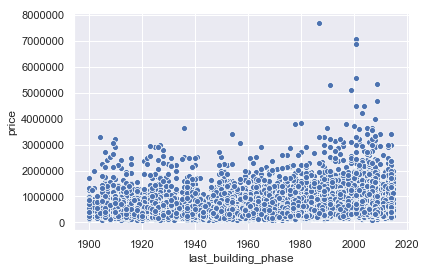

In [26]:
sns.scatterplot(x="last_building_phase", y="price", data=df2);

There is a small relationship between price and last_building_phase.

## Visualisation

Lets plot some data

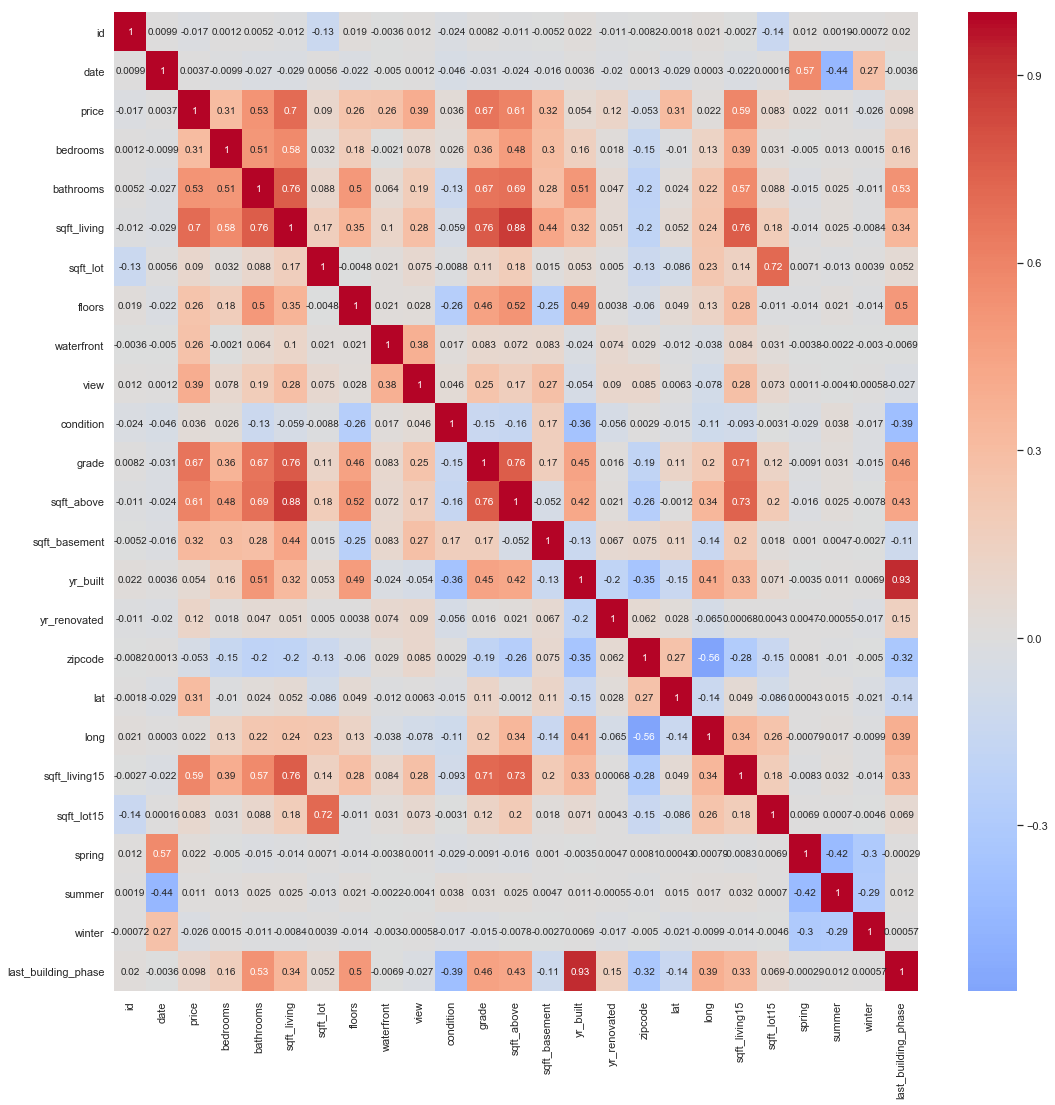

In [27]:
corr = df2.corr()
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(data=corr, center = 0, cmap="coolwarm", annot=True);

There are variables that have a correlation with price:
- bedrooms 0.31
- bathrooms 0.53
- sqft_living 0.7
- sqft_lot 0.09
- floors 0.26
- waterfront 0.26
- view 0.39
- grade 0.67
- sqft_above 0.31
- sqft_basement 0.32
- year_renovated 0.12
- lat 0.31
- sqft_living 0.59
- last_building_phase 0.098

Lets plot the location and the price:

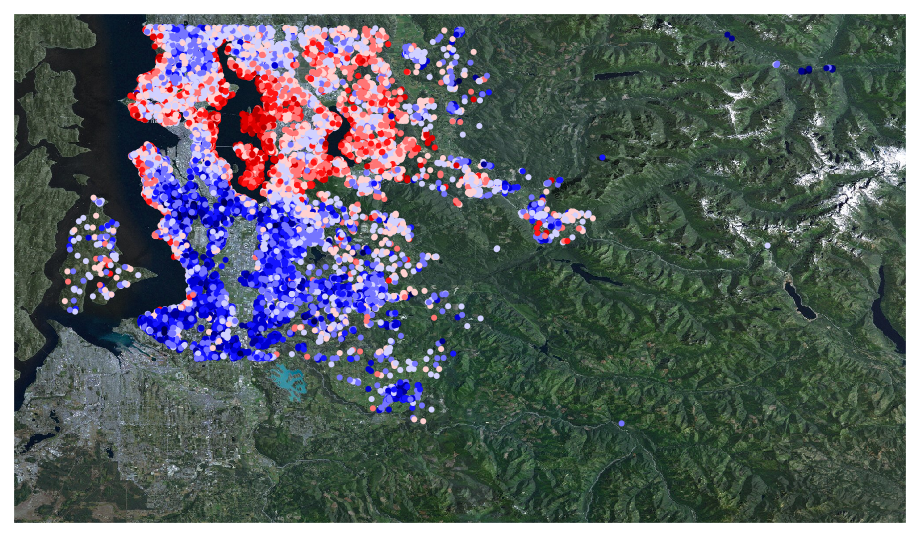

In [28]:
# Extract the data we're interested in
lat = df['lat'].values
lon = df['long'].values
bins = [0, 150000, 200000, 250000, 300000, 400000, 550000 ,750000, 1000000, 1500000, 2500000, 5000000, 10000000]
c = pd.cut(df['price'], bins, labels = range(12))
# 1. Draw the map background
fig = plt.figure(figsize=(16, 16))
m = Basemap(projection='merc', resolution='h', llcrnrlon = -122.6, llcrnrlat = 47, urcrnrlon = -121.2, urcrnrlat = 47.8,
            lon_0= -121.7,
            lat_0= 47.4,
            epsg=4269)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000)

# 2. scatter house data, with color reflecting prizes
lons, lats = m(lon, lat)
m.scatter(lons, lats,zorder=1, linewidths=0.07, cmap = 'seismic', c = c)

plt.show()

We see that there is a correlation between location and price.

## generate dummies for longitude and latitude

Lets group our houses for longitude and latitude

In [29]:
#seperate the latitude into seven parts
lat = []
for i in (range(len(df))):
    if df['lat'][i] < 47.2:
        lat.append('lat_47.2')
    elif df['lat'][i] < 47.3:
        lat.append('lat_47.3')
    elif df['lat'][i] < 47.4:
        lat.append('lat_47.4')
    elif df['lat'][i] < 47.5:
        lat.append('lat_47.5')
    elif df['lat'][i] < 47.6:
        lat.append('lat_47.6')
    elif df['lat'][i] < 47.7:
        lat.append('lat_47.7')
    else:
        lat.append('lat_47.8')

In [30]:
#seperate the longitude into seven parts
long = []
for i in (range(len(df))):
    if df['long'][i] < -122.4:
        long.append('long_-122.4')
    elif df['long'][i] < -122.2:
        long.append('long_-122.2')
    elif df['long'][i] < -122:
        long.append('long_-122')
    elif df['long'][i] < -121.8:
        long.append('long_-121.8')
    elif df['long'][i] < -121.6:
        long.append('long_-121.6')
    elif df['long'][i] < -121.4:
        long.append('long_-121.4')
    else:
        long.append('long_-121.2')

In [31]:
#introduce dummy variables
lat_dummies = pd.get_dummies(lat, drop_first=True)
long_dummies = pd.get_dummies(long, drop_first=True)
long_dummies.head()

,long_-121.4,long_-121.6,long_-121.8,long_-122,long_-122.2,long_-122.4
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [32]:
lat_long = pd.concat([lat_dummies, long_dummies], axis = 1)
lat_long.head()

,lat_47.3,lat_47.4,lat_47.5,lat_47.6,lat_47.7,lat_47.8,long_-121.4,long_-121.6,long_-121.8,long_-122,long_-122.2,long_-122.4
0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,1,0,0


In [33]:
# join our dataframe with the dummies
df3 = pd.concat([df2, lat_long], axis = 1)

## Model a linear Regression

First we take the variables with the highest correlation with the price and our dummies for the location

In [34]:
X = df3[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'lat_47.8', 'lat_47.3', 'lat_47.4',
       'lat_47.5', 'lat_47.6', 'lat_47.7', 'long_-122.4', 'long_-121.4',
       'long_-121.6', 'long_-121.8', 'long_-122', 'long_-122.2']]
y = df3[['price']]
X = sms.add_constant(X)
model = sms.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     2740.
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:56:31   Log-Likelihood:            -2.9336e+05
No. Observations:               21597   AIC:                         5.868e+05
Df Residuals:                   21575   BIC:                         5.869e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.409e+05   6.26e+04     -7.039      0.000   -5.64e+05   -3.18e+05
bedrooms      -2.451e+04   1806.001    -13.570      0.000    -2.8e+04    -2.1e+04
bathrooms      1.454e+04   2936.901      4.952      0.000    8786.795    2.03e+04
sqft_living     128.5872      2.005     64.125      0.000     124.657     132.518
sqft_lot          0.1172      0.034      3.485      0.000       0.051       0.183
floors        -7.445e+04   3338.798    -22.299      0.000    -8.1e+04   -6.79e+04
waterfront     6.575e+05   1.73e+04     38.000      0.000    6.24e+05    6.91e+05
view           5.832e+04   1999.164     29.171      0.000    5.44e+04    6.22e+04
grade          6.656e+04   1941.184     34.291      0.000    6.28e+04    7.04e+04
sqft_above      101.6745      2.035     49.965      0.000      97.686     105.663
sqft_basement    26.9127      2.530     10.636      0.000      21.953      31.872
lat_47.8       1.164e+05   2.17e+04      5.370      0.000    7.39e+04    1.59e+05
lat_47.3      -5.139e+04   2.25e+04     -2.281      0.023   -9.56e+04   -7235.817
lat_47.4      -4.009e+04   2.17e+04     -1.845      0.065   -8.27e+04    2489.904
lat_47.5       1.744e+04   2.17e+04      0.802      0.422   -2.52e+04    6.01e+04
lat_47.6       1.766e+05   2.16e+04      8.192      0.000    1.34e+05    2.19e+05
lat_47.7       3.217e+05   2.16e+04     14.869      0.000    2.79e+05    3.64e+05
long_-122.4    6.164e+04    5.9e+04      1.046      0.296   -5.39e+04    1.77e+05
long_-121.4   -1.014e+05   9.74e+04     -1.041      0.298   -2.92e+05    8.96e+04
long_-121.6    2.389e+04   5.95e+04      0.401      0.688   -9.28e+04    1.41e+05
long_-121.8   -9.844e+04   5.83e+04     -1.689      0.091   -2.13e+05    1.58e+04
long_-122     -2.936e+04   5.81e+04     -0.506      0.613   -1.43e+05    8.45e+04
long_-122.2     4.69e+04    5.8e+04      0.809      0.419   -6.68e+04    1.61e+05
==============================================================================
Omnibus:                    18904.678   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2171070.288
Skew:                           3.701   Prob(JB):                         0.00
Kurtosis:                      51.558   Cond. No.                     7.81e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.89e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

R-squared is 0.727 not bad at all.

## Improving our approach

We want to introduce dummy variables for the zipcode, because the zipcode is an integer but is actual a categorial variable.

First we plot the zipcode and try to get some insights

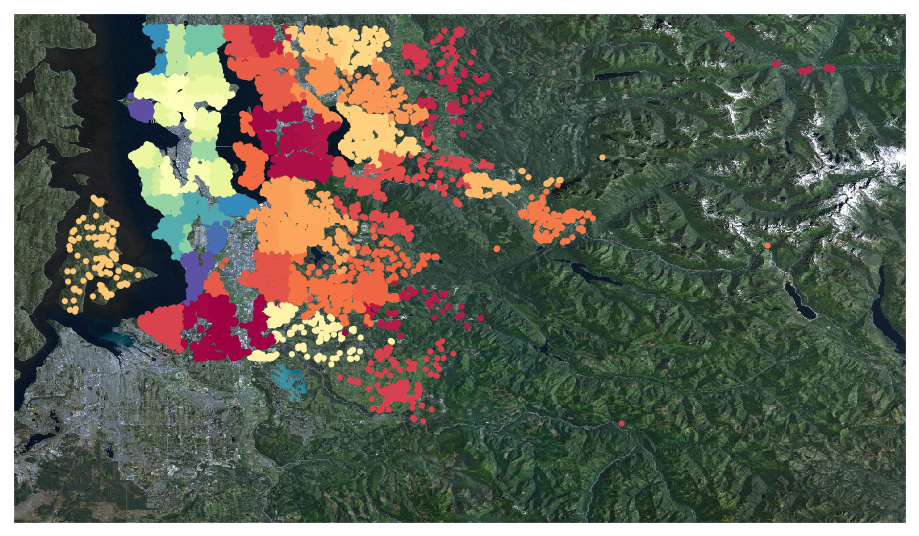

In [35]:
# Extract the data we're interested in
lat = df['lat'].values
lon = df['long'].values
# 1. Draw the map background
fig = plt.figure(figsize=(16, 16))
m = Basemap(projection='merc', resolution='h', llcrnrlon = -122.6, llcrnrlat = 47, urcrnrlon = -121.2, urcrnrlat = 47.8,
            lon_0= -121.7,
            lat_0= 47.4,
            epsg=4269)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000)

# 2. scatter city data, with color reflecting zipcode areas
lons, lats = m(lon, lat)
m.scatter(lons, lats,zorder=1, linewidths=0.1 , c = df['zipcode'].values, cmap = 'Spectral')

plt.show()

Seems to work quite good and should be more exact than just the dummies for longitude and latitude.

In [36]:
#model with the most correlated variables and dummies for the zipcode
model = ols('price ~ C(zipcode) + bedrooms + bathrooms + sqft_lot + floors + waterfront + view + grade + sqft_above + sqft_basement + last_building_phase', data=df3).fit() 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     1119.
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:56:44   Log-Likelihood:            -2.8978e+05
No. Observations:               21597   AIC:                         5.797e+05
Df Residuals:                   21517   BIC:                         5.804e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.056e+06   1.13e+05      9.346      0.000    8.34e+05    1.28e+06
C(zipcode)[T.98002]  3.497e+04   1.44e+04      2.429      0.015    6747.289    6.32e+04
C(zipcode)[T.98003] -1.719e+04    1.3e+04     -1.324      0.185   -4.26e+04    8253.120
C(zipcode)[T.98004]  7.868e+05   1.27e+04     62.025      0.000    7.62e+05    8.12e+05
C(zipcode)[T.98005]  3.104e+05   1.53e+04     20.244      0.000     2.8e+05    3.41e+05
C(zipcode)[T.98006]  2.772e+05   1.14e+04     24.239      0.000    2.55e+05       3e+05
C(zipcode)[T.98007]  2.513e+05   1.62e+04     15.488      0.000    2.19e+05    2.83e+05
C(zipcode)[T.98008]  2.538e+05    1.3e+04     19.529      0.000    2.28e+05    2.79e+05
C(zipcode)[T.98010]    7.7e+04   1.84e+04      4.174      0.000    4.08e+04    1.13e+05
C(zipcode)[T.98011]  1.217e+05   1.45e+04      8.398      0.000    9.33e+04     1.5e+05
C(zipcode)[T.98014]  9.283e+04   1.71e+04      5.419      0.000    5.93e+04    1.26e+05
C(zipcode)[T.98019]  8.653e+04   1.46e+04      5.913      0.000    5.78e+04    1.15e+05
C(zipcode)[T.98022] -5201.3953   1.38e+04     -0.376      0.707   -3.23e+04    2.19e+04
C(zipcode)[T.98023] -3.287e+04   1.13e+04     -2.917      0.004    -5.5e+04   -1.08e+04
C(zipcode)[T.98024]  1.521e+05   2.03e+04      7.498      0.000    1.12e+05    1.92e+05
C(zipcode)[T.98027]  1.708e+05   1.18e+04     14.465      0.000    1.48e+05    1.94e+05
C(zipcode)[T.98028]  1.195e+05   1.29e+04      9.237      0.000    9.42e+04    1.45e+05
C(zipcode)[T.98029]  2.105e+05   1.26e+04     16.720      0.000    1.86e+05    2.35e+05
C(zipcode)[T.98030]  4456.9119   1.33e+04      0.335      0.738   -2.16e+04    3.05e+04
C(zipcode)[T.98031]  1.854e+04   1.31e+04      1.419      0.156   -7068.667    4.42e+04
C(zipcode)[T.98032]  1.034e+04   1.69e+04      0.611      0.541   -2.28e+04    4.35e+04
C(zipcode)[T.98033]  3.705e+05   1.17e+04     31.779      0.000    3.48e+05    3.93e+05
C(zipcode)[T.98034]  2.012e+05   1.11e+04     18.173      0.000    1.79e+05    2.23e+05
C(zipcode)[T.98038]  3.168e+04   1.09e+04      2.900      0.004    1.03e+04    5.31e+04
C(zipcode)[T.98039]  1.332e+06   2.48e+04     53.757      0.000    1.28e+06    1.38e+06
C(zipcode)[T.98040]  5.297e+05   1.32e+04     40.275      0.000    5.04e+05    5.56e+05
C(zipcode)[T.98042]  1.124e+04    1.1e+04      1.017      0.309   -1.04e+04    3.29e+04
C(zipcode)[T.98045]  8.461e+04    1.4e+04      6.055      0.000    5.72e+04    1.12e+05
C(zipcode)[T.98052]  2.285e+05    1.1e+04     20.786      0.000    2.07e+05     2.5e+05
C(zipcode)[T.98053]  1.864e+05   1.19e+04     15.637      0.000    1.63e+05     2.1e+05
C(zipcode)[T.98055]  4.632e+04   1.31e+04      3.524      0.000    2.06e+04    7.21e+04
C(zipcode)[T.98056]  1.046e+05   1.18e+04      8.876      0.000    8.15e+04    1.28e+05
C(z

R-squared is 0.804 so we got an better result

So making dummies out of a categorial variable improved our model quite good. So lets take a look at other categorial variables.

Lets take a look at grade

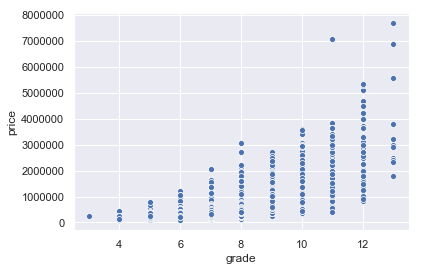

In [37]:
sns.scatterplot(x="grade", y="price", data=df3);

Lets generate dummy variables for grade and model it

In [38]:
model = ols('price ~ C(grade) + C(zipcode) + bedrooms + bathrooms+ sqft_living + sqft_lot + floors + waterfront + view + sqft_above + sqft_basement + last_building_phase', data=df3).fit() 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1191.
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:56:45   Log-Likelihood:            -2.8827e+05
No. Observations:               21597   AIC:                         5.767e+05
Df Residuals:                   21508   BIC:                         5.774e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            9.453e+05   1.86e+05      5.088      0.000    5.81e+05    1.31e+06
C(grade)[T.4]       -1.677e+05   1.55e+05     -1.081      0.280   -4.72e+05    1.36e+05
C(grade)[T.5]       -2.039e+05   1.53e+05     -1.336      0.181   -5.03e+05    9.51e+04
C(grade)[T.6]       -2.024e+05   1.52e+05     -1.329      0.184   -5.01e+05    9.61e+04
C(grade)[T.7]       -2.007e+05   1.52e+05     -1.318      0.187   -4.99e+05    9.78e+04
C(grade)[T.8]       -1.772e+05   1.52e+05     -1.163      0.245   -4.76e+05    1.21e+05
C(grade)[T.9]       -1.031e+05   1.52e+05     -0.677      0.499   -4.02e+05    1.96e+05
C(grade)[T.10]        1.58e+04   1.52e+05      0.104      0.917   -2.83e+05    3.15e+05
C(grade)[T.11]       2.085e+05   1.53e+05      1.366      0.172   -9.08e+04    5.08e+05
C(grade)[T.12]       6.141e+05   1.54e+05      4.000      0.000    3.13e+05    9.15e+05
C(grade)[T.13]       1.712e+06   1.59e+05     10.785      0.000     1.4e+06    2.02e+06
C(zipcode)[T.98002]  1.377e+04   1.34e+04      1.024      0.306   -1.26e+04    4.01e+04
C(zipcode)[T.98003] -7461.9934   1.21e+04     -0.616      0.538   -3.12e+04    1.63e+04
C(zipcode)[T.98004]  7.787e+05   1.18e+04     65.755      0.000    7.55e+05    8.02e+05
C(zipcode)[T.98005]  3.198e+05   1.43e+04     22.328      0.000    2.92e+05    3.48e+05
C(zipcode)[T.98006]  2.635e+05   1.07e+04     24.660      0.000    2.43e+05    2.84e+05
C(zipcode)[T.98007]  2.622e+05   1.51e+04     17.319      0.000    2.33e+05    2.92e+05
C(zipcode)[T.98008]  2.678e+05   1.21e+04     22.082      0.000    2.44e+05    2.92e+05
C(zipcode)[T.98010]  6.984e+04   1.72e+04      4.056      0.000    3.61e+04    1.04e+05
C(zipcode)[T.98011]  1.372e+05   1.35e+04     10.148      0.000    1.11e+05    1.64e+05
C(zipcode)[T.98014]  8.581e+04    1.6e+04      5.362      0.000    5.44e+04    1.17e+05
C(zipcode)[T.98019]  9.398e+04   1.37e+04      6.882      0.000    6.72e+04    1.21e+05
C(zipcode)[T.98022] -2594.8172   1.29e+04     -0.201      0.841   -2.79e+04    2.27e+04
C(zipcode)[T.98023] -2.733e+04   1.05e+04     -2.598      0.009   -4.79e+04   -6708.254
C(zipcode)[T.98024]  1.518e+05   1.89e+04      8.013      0.000    1.15e+05    1.89e+05
C(zipcode)[T.98027]  1.732e+05    1.1e+04     15.701      0.000    1.52e+05    1.95e+05
C(zipcode)[T.98028]  1.335e+05   1.21e+04     11.054      0.000     1.1e+05    1.57e+05
C(zipcode)[T.98029]  2.239e+05   1.18e+04     19.034      0.000    2.01e+05    2.47e+05
C(zipcode)[T.98030]  7077.1394   1.24e+04      0.570      0.569   -1.73e+04    3.14e+04
C(zipcode)[T.98031]  2.154e+04   1.22e+04      1.767      0.077   -2357.074    4.54e+04
C(zipcode)[T.98032]  8549.9058   1.58e+04      0.541      0.588   -2.24e+04    3.95e+04
C(zipcode)[T.98033]   3.69e+05   1.09e+04     33.910      0.000    3.48e+05     3.9e+05
C(z

Seems like a good model so far. Lets try to drop some variables that have a low correlation with the price.
So we take a look at the heatmap again

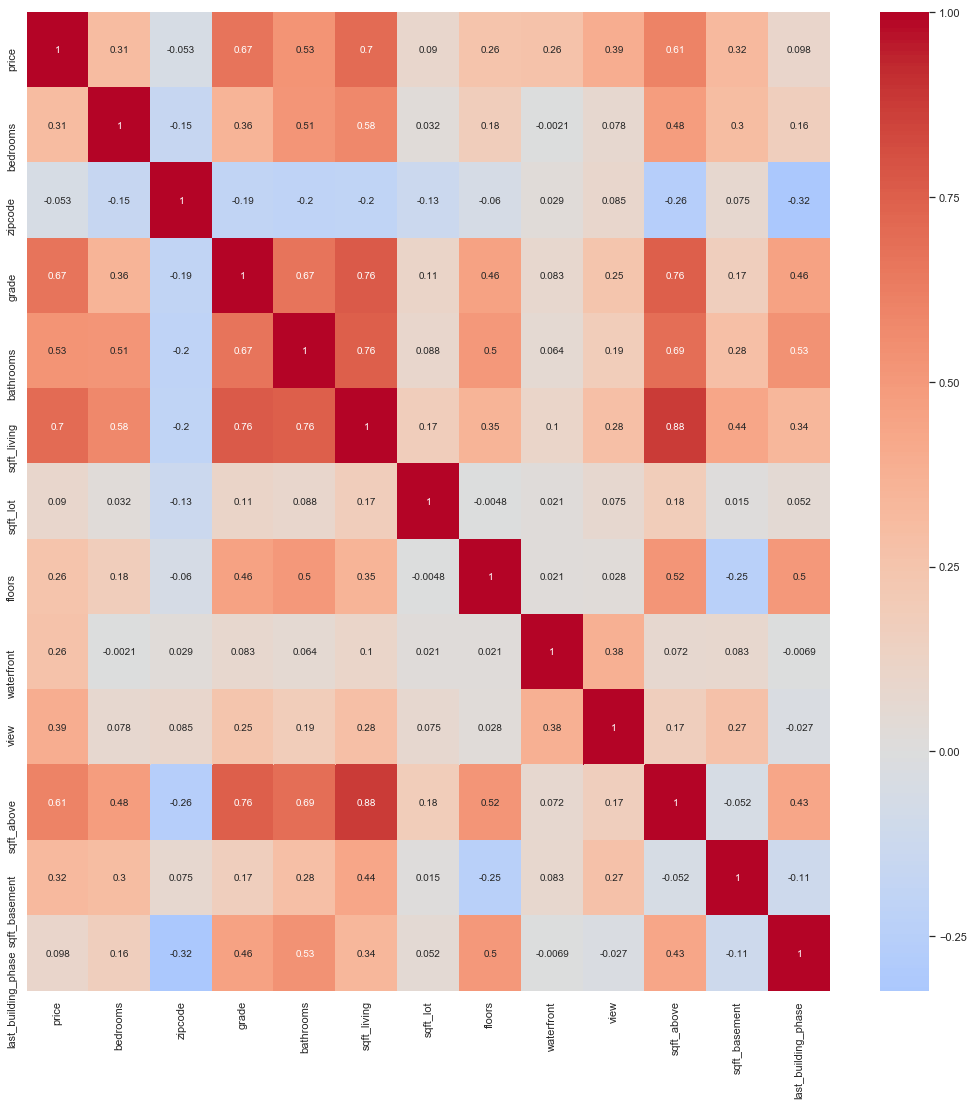

In [39]:
corr = df2[['price','bedrooms', 'zipcode','grade','bathrooms','sqft_living', 'sqft_lot','floors','waterfront','view','sqft_above','sqft_basement','last_building_phase']].corr()
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(data=corr, center = 0, cmap="coolwarm", annot=True);

Lets try a model were we just keep variables with a correlation of 0.3 and above:
- bathrooms
- bedrooms
- sqft_living
- sqft_above
- view
- sqft_basement

Also we want to keep our categorial variables 
- zipcode 
- grade
    
We also decided to drop bedrooms because bathrooms is defined as bathrooms per bedrooms therefore they have a high correlation.
The same goes for sqft_above and sqft_basement, because the sum of them is sqft_living

In [40]:
model = ols('price ~ C(grade) + C(zipcode) + bathrooms + sqft_living + view', data=df3).fit() 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1101.
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:56:46   Log-Likelihood:            -2.8959e+05
No. Observations:               21597   AIC:                         5.794e+05
Df Residuals:                   21514   BIC:                         5.800e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.758e+05   1.62e+05      1.085      0.278   -1.42e+05    4.93e+05
C(grade)[T.4]       -1.812e+05   1.65e+05     -1.099      0.272   -5.04e+05    1.42e+05
C(grade)[T.5]       -2.053e+05   1.62e+05     -1.266      0.205   -5.23e+05    1.13e+05
C(grade)[T.6]       -2.155e+05   1.62e+05     -1.331      0.183   -5.33e+05    1.02e+05
C(grade)[T.7]       -2.239e+05   1.62e+05     -1.383      0.167   -5.41e+05    9.33e+04
C(grade)[T.8]       -2.074e+05   1.62e+05     -1.281      0.200   -5.25e+05     1.1e+05
C(grade)[T.9]       -1.307e+05   1.62e+05     -0.807      0.419   -4.48e+05    1.87e+05
C(grade)[T.10]       3924.9530   1.62e+05      0.024      0.981   -3.14e+05    3.21e+05
C(grade)[T.11]       2.168e+05   1.62e+05      1.337      0.181   -1.01e+05    5.35e+05
C(grade)[T.12]       6.706e+05   1.63e+05      4.113      0.000    3.51e+05     9.9e+05
C(grade)[T.13]       1.711e+06   1.69e+05     10.154      0.000    1.38e+06    2.04e+06
C(zipcode)[T.98002]  1.522e+04   1.43e+04      1.065      0.287   -1.28e+04    4.32e+04
C(zipcode)[T.98003] -6813.3564   1.29e+04     -0.529      0.597    -3.2e+04    1.84e+04
C(zipcode)[T.98004]  7.798e+05   1.25e+04     62.174      0.000    7.55e+05    8.04e+05
C(zipcode)[T.98005]  3.301e+05   1.52e+04     21.783      0.000       3e+05     3.6e+05
C(zipcode)[T.98006]  2.524e+05   1.13e+04     22.332      0.000     2.3e+05    2.75e+05
C(zipcode)[T.98007]  2.664e+05   1.61e+04     16.589      0.000    2.35e+05    2.98e+05
C(zipcode)[T.98008]  2.835e+05   1.28e+04     22.076      0.000    2.58e+05    3.09e+05
C(zipcode)[T.98010]  7.861e+04   1.83e+04      4.303      0.000    4.28e+04    1.14e+05
C(zipcode)[T.98011]  1.403e+05   1.44e+04      9.769      0.000    1.12e+05    1.69e+05
C(zipcode)[T.98014]  1.029e+05   1.68e+04      6.109      0.000    6.99e+04    1.36e+05
C(zipcode)[T.98019]  9.942e+04   1.45e+04      6.864      0.000     7.1e+04    1.28e+05
C(zipcode)[T.98022]  1622.5155   1.36e+04      0.119      0.905   -2.51e+04    2.83e+04
C(zipcode)[T.98023] -2.225e+04   1.12e+04     -1.992      0.046   -4.41e+04    -351.073
C(zipcode)[T.98024]  1.757e+05      2e+04      8.797      0.000    1.37e+05    2.15e+05
C(zipcode)[T.98027]   1.74e+05   1.17e+04     14.874      0.000    1.51e+05    1.97e+05
C(zipcode)[T.98028]  1.346e+05   1.28e+04     10.495      0.000    1.09e+05     1.6e+05
C(zipcode)[T.98029]  2.225e+05   1.25e+04     17.815      0.000    1.98e+05    2.47e+05
C(zipcode)[T.98030]  9220.0878   1.32e+04      0.699      0.485   -1.66e+04    3.51e+04
C(zipcode)[T.98031]  2.378e+04    1.3e+04      1.835      0.066   -1618.678    4.92e+04
C(zipcode)[T.98032]  6383.0323   1.68e+04      0.381      0.703   -2.65e+04    3.93e+04
C(zipcode)[T.98033]    3.7e+05   1.16e+04     32.031      0.000    3.47e+05    3.93e+05
C(z

So we just got down to five variables and we still got a pretty nice R-squared value of 0.808

## trying different models

In [41]:
#preparing our dataframe to perform different models
df4 = df2.copy()
y = df4.price.values # define the target variable (dependent variable) as y
df4.drop('price', axis=1, inplace=True)
zipcode_dummies = pd.get_dummies(df4.zipcode, drop_first=True, prefix = 'zipcode') #introduce dummies for zipcode
grade_dummies = pd.get_dummies(df4.grade, drop_first=True, prefix = 'grade') #introduce dummies for grade
dummies = pd.concat([zipcode_dummies, grade_dummies], axis = 1)

In [42]:
#drop the features we do not need
df4.drop('sqft_lot', axis=1, inplace=True)
df4.drop('floors', axis=1, inplace=True)
df4.drop('lat', axis=1, inplace=True)
df4.drop('long', axis=1, inplace=True)
df4.drop('zipcode',axis=1, inplace=True)
df4.drop('sqft_living15', axis=1, inplace=True)
df4.drop('sqft_lot15', axis=1, inplace=True)
df4.drop('spring', axis=1, inplace=True)
df4.drop('summer', axis=1, inplace=True)
df4.drop('winter', axis=1, inplace=True)
df4.drop('yr_built', axis=1, inplace=True)
df4.drop('sqft_basement', axis=1, inplace=True)
df4.drop('sqft_above', axis=1, inplace=True)
df4.drop('grade', axis=1, inplace=True)
df4.drop('bedrooms', axis=1, inplace=True)
df4.drop('date', axis=1, inplace=True)

In [43]:
#join with our dummies
df4  = pd.concat([df4, dummies], axis = 1)

## train/test split

In [44]:
result = []

#split the data
X_train, X_test, y_train, y_test = train_test_split(df4, y, test_size=0.2)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
result.append(model.score(X_test, y_test))
print('Train/test split score: ' + str(np.mean(result)))

Train/test split score: 0.8279509225077162


## K-fold cross validation

In [45]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df4, y, cv=6)
print('Cross-validated score:', np.mean(scores))

Cross-validated score: 0.824289910931233


## Summary

After cleaning and exploration of our data we figured out that the most important feature for house prices in King County.
Important features.
- location
- grade
- bathrooms
- sqft_living 
- view

Considering this features our linear model got a R-squared value of 0.808

## Buisness recommendations

House sellers:
- try to improve the grade of your house
- modelling the fair price of the house to get the maximum

House buyers:
- be sure about the location the house is based
- calculate the fair price of the house to not pay a premium


## Future work

- get more data
- improve data cleaning
    - find a better solution for the cleaning of the waterfront
- get more into detail of the data to find more correlations